In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('ronda1.csv', sep=';', decimal=',')
df2 = pd.read_csv('ronda2.csv', sep=';', decimal=',')
df3 = pd.read_csv('ronda3.csv', sep=';', decimal=',')

df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.columns)

Index(['Angulo real', 'Encoder', 'Real ajustado'], dtype='object')


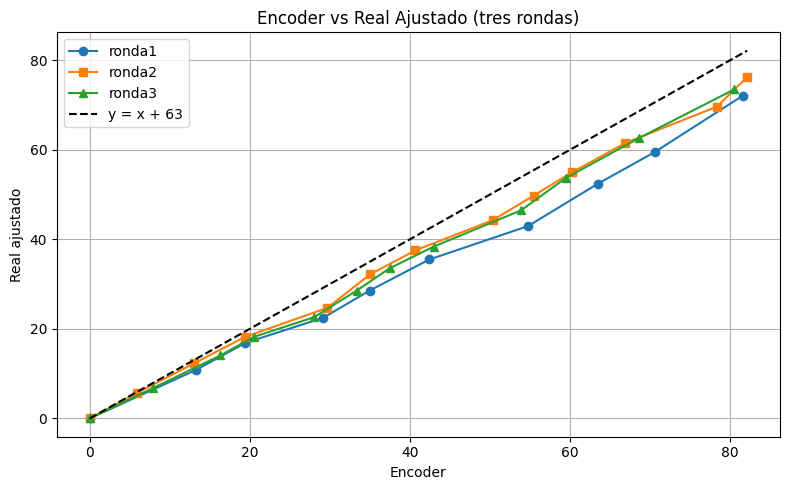

In [3]:
plt.figure(figsize=(8,5))

for df_i, label, marker in [(df1, 'ronda1', 'o'),
                            (df2, 'ronda2', 's'),
                            (df3, 'ronda3', '^')]:
    d = df_i.sort_values('Encoder')
    plt.plot(d['Encoder'], d['Real ajustado'],
             marker=marker, linestyle='-', label=label)

# --- Add line y = x + 63 ---
# Build x range from all data
xmin = min(df1['Encoder'].min(), df2['Encoder'].min(), df3['Encoder'].min())
xmax = max(df1['Encoder'].max(), df2['Encoder'].max(), df3['Encoder'].max())
x_line = np.linspace(xmin, xmax, 300)
y_line = x_line

plt.plot(x_line, y_line, 'k--', label='y = x + 63')
# --------------------------------

plt.xlabel('Encoder')
plt.ylabel('Real ajustado')
plt.title('Encoder vs Real Ajustado (tres rondas)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Here is the section formatted cleanly in **Markdown** so you can paste it directly into your document:

---

## Calibración del ángulo real vs. ángulo del encoder

Para corregir la diferencia entre el ángulo medido por el encoder y el ángulo real alcanzado por el brazo (producto de flexión mecánica, holguras, etc.), se ajusta una relación lineal entre ambas mediciones:

[
\theta_\text{real} = a,\theta_\text{enc} + b
]

Donde:

* **(\theta_\text{enc})**: ángulo leído desde el encoder
* **(\theta_\text{real})**: ángulo real medido por el instrumento externo
* **(a)**: error de escala (derivado de flexión, imperfecciones mecánicas o transmisión)
* **(b)**: error de offset (desalineación del cero mecánico)

Esta ecuación permite transformar ángulos deseados en ángulos que el controlador debe pedirle al encoder:

[
\theta_\text{enc,cmd} = \frac{\theta_\text{desired} - b}{a}
]

De esta manera, aunque el encoder no represente perfectamente la posición real, el controlador puede compensarlo utilizando la curva de calibración obtenida experimentalmente.

---


In [7]:
# Extract columns into numpy arrays
encoder_angle = df['Encoder'].to_numpy()
real_angle = df['Angulo real'].to_numpy()

print(f"Encoder angle shape: {encoder_angle.shape}")
print(f"Real angle shape: {real_angle.shape}")

start_enconder_angle = np.min(real_angle)
print(f"Start encoder angle: {start_enconder_angle}")

Encoder angle shape: (35,)
Real angle shape: (35,)
Start encoder angle: 62.8


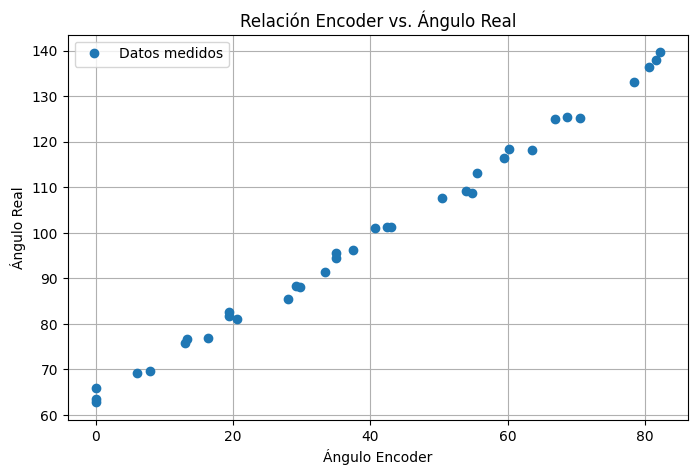

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(encoder_angle, real_angle, 'o', label='Datos medidos')

plt.xlabel('Ángulo Encoder')
plt.ylabel('Ángulo Real')
plt.title('Relación Encoder vs. Ángulo Real')
plt.grid(True)
plt.legend()
plt.show()